# Assigment 1 - Part 2

# Text Classification Assignment: Movie Review Sentiment Analysis

In [18]:
import nltk
import random
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

## 1. Data Preparation

In [19]:
# Download necessary NLTK data
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/prudhvivuda/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/prudhvivuda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prudhvivuda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/prudhvivuda/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
# Data Preparation
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [21]:
def preprocess(doc):
    return ' '.join(
        [lemmatizer.lemmatize(word.lower()) for word in doc if word.isalpha() and word.lower() not in stop_words]
    )

reviews = [preprocess(words) for words, label in documents]
labels = [label for _, label in documents]

## 2. Coverage Analysis Insights

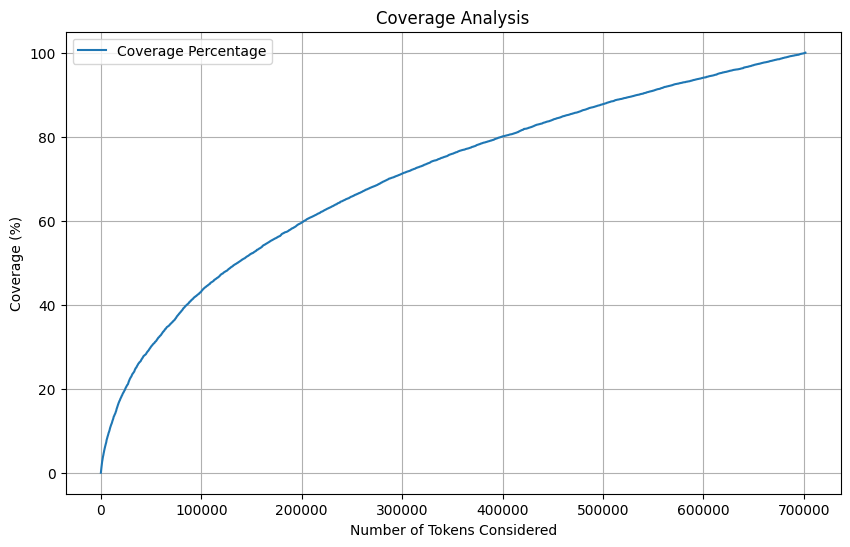

In [22]:
# Coverage Analysis
all_tokens = [word for review in reviews for word in review.split()]
unique_tokens = set(all_tokens)
coverage = []
unique_covered = set()

for i, token in enumerate(all_tokens):
    unique_covered.add(token)
    coverage.append(len(unique_covered) / len(unique_tokens) * 100)
    if len(unique_covered) == len(unique_tokens):
        break

plt.figure(figsize=(10, 6))
plt.plot(range(len(coverage)), coverage, label='Coverage Percentage')
plt.xlabel('Number of Tokens Considered')
plt.ylabel('Coverage (%)')
plt.title('Coverage Analysis')
plt.legend()
plt.grid()
plt.show()

1. **Trade-off Between Vocabulary Size and Computational Efficiency**:
   - A larger vocabulary size increases the dimensionality of feature vectors, which can lead to higher computational costs and memory usage.
   - Choosing a smaller vocabulary by removing stop words and rare words improves efficiency while retaining the most informative words for classification.

2. **Impact of Rare or Very Common Words**:
   - Rare words may have limited impact on the model’s generalization, as they occur infrequently and do not significantly influence predictions.
   - Very common words, such as stop words, carry little semantic value and can be excluded to reduce noise.

3. **Balancing Informativeness and Model Complexity**:
   - Reducing vocabulary size balances informativeness with simplicity, as it reduces overfitting risks, especially for high-capacity models like MLPs.
   - Using TF-IDF instead of raw TF helps emphasize less frequent but informative words, enhancing model performance.

4. **Considerations for Specific Algorithms**:
   - **Naive Bayes**: Performs well with smaller vocabularies since it assumes feature independence and may benefit from reduced dimensionality.
   - **Logistic Regression**: Handles larger vocabularies better but risks overfitting; regularization mitigates this.
   - **MLP**: High-capacity models like MLPs can handle larger vocabularies but require more data and computational resources to train effectively.

## 3. Algorithm Implementation

In [32]:
# Naive Bayes Implementation
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report

# Initialize vectorizers
vectorizers = {
    "TF": CountVectorizer(),
    "TF-IDF": TfidfVectorizer()
}

### a. Naive Bayes

In [23]:
# Naive Bayes Implementation and Training
def naive_bayes_model(vectorizer, X_train, X_test, y_train, y_test):
    
    nb_model = MultinomialNB()
    
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    
    nb_model.fit(X_train_vec, y_train)
    
    y_pred_nb = nb_model.predict(X_test_vec)
    
    nb_accuracy = accuracy_score(y_test, y_pred_nb)
    
    print(f"Naive Bayes Accuracy using {vectorizer.__class__.__name__}: {nb_accuracy}")
    print(f"Naive Bayes Classification Report using {vectorizer.__class__.__name__}:\n", classification_report(y_test, y_pred_nb))
    
    return nb_accuracy


### b. Logistic Regression

In [24]:
# Logistic Regression Implementation
from sklearn.linear_model import LogisticRegression

# Logistic Regression Implementation and Training
def logistic_regression_model(vectorizer, X_train, X_test, y_train, y_test):
    lr_model = LogisticRegression(max_iter=1000)
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)
    lr_model.fit(X_train_vec, y_train)
    y_pred_lr = lr_model.predict(X_test_vec)
    lr_accuracy = accuracy_score(y_test, y_pred_lr)
    print(f"Logistic Regression Accuracy using {vectorizer.__class__.__name__}: {lr_accuracy}")
    print(f"Logistic Regression Classification Report using {vectorizer.__class__.__name__}:\n", classification_report(y_test, y_pred_lr))
    return lr_accuracy


### c. Multilayer Perceptron

In [25]:
# MLP Implementation
from sklearn.neural_network import MLPClassifier

# MLP Architectures
mlp_architectures = [
    (50,),         # 1 hidden layer with 50 neurons
    (100,),        # 1 hidden layer with 100 neurons
    (100, 50),     # 2 hidden layers: 100 neurons in the first, 50 in the second
    (100, 50, 25)  # 3 hidden layers: 100 neurons in the first, 50 in the second, 25 in the third
]

# MLP Implementation and Training
def mlp_model(vectorizer, X_train, X_test, y_train, y_test):
    mlp_accuracies = []
    for architecture in mlp_architectures:
        mlp_model = MLPClassifier(hidden_layer_sizes=architecture, max_iter=300, random_state=42)
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)
        mlp_model.fit(X_train_vec, y_train)
        y_pred_mlp = mlp_model.predict(X_test_vec)
        mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
        print(f"MLP Architecture {architecture} Accuracy: {mlp_accuracy}")
        mlp_accuracies.append((architecture, mlp_accuracy))
    return mlp_accuracies


## 4. Training and Evaluation

### a. Train Each Algorithm

In [26]:
# Training each algorithm on the training set
from sklearn.model_selection import train_test_split
import random

# Data Preparation (assumes reviews and labels are already processed)
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

# Train and evaluate models using both TF and TF-IDF
for vec_name, vectorizer in vectorizers.items():
    print(f"Results using {vec_name}:")
    
    # Train and evaluate Naive Bayes
    nb_accuracy = naive_bayes_model(vectorizer, X_train, X_test, y_train, y_test)
    
    # Train and evaluate Logistic Regression
    lr_accuracy = logistic_regression_model(vectorizer, X_train, X_test, y_train, y_test)
    
    # Train and evaluate MLP
    mlp_accuracies = mlp_model(vectorizer, X_train, X_test, y_train, y_test)


Results using TF:
Naive Bayes Accuracy using CountVectorizer: 0.8425
Naive Bayes Classification Report using CountVectorizer:
               precision    recall  f1-score   support

         neg       0.83      0.87      0.85       207
         pos       0.85      0.81      0.83       193

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400

Logistic Regression Accuracy using CountVectorizer: 0.84
Logistic Regression Classification Report using CountVectorizer:
               precision    recall  f1-score   support

         neg       0.84      0.86      0.85       207
         pos       0.84      0.82      0.83       193

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400

MLP Architecture (50,) Accuracy: 0.87
MLP Architecture (100,) Accuracy: 0.8775
MLP Architecture 

### b. Evaluate Performance (Accuracy, TPR, FPR):

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

# Evaluate performance using accuracy, TPR, FPR
def evaluate_performance(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    tp = cm[1, 1]
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    
    # True Positive Rate (TPR) and False Positive Rate (FPR)
    tpr = tp / (tp + fn) if (tp + fn) != 0 else 0
    fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
    
    print(f"TPR: {tpr}, FPR: {fpr}")
    return tpr, fpr

### c. Compare Impact of TF vs. TF-IDF

In [31]:
# Compare TF vs. TF-IDF
def compare_tf_vs_tfidf(vectorizers, X_train, X_test, y_train, y_test):
    results = {}
    for vec_name, vectorizer in vectorizers.items():
        print(f"\nEvaluating using {vec_name}...")
        
        # Naive Bayes
        nb_accuracy = naive_bayes_model(vectorizer, X_train, X_test, y_train, y_test)
        
        # Logistic Regression
        lr_accuracy = logistic_regression_model(vectorizer, X_train, X_test, y_train, y_test)
        
        # MLP
        mlp_accuracies = mlp_model(vectorizer, X_train, X_test, y_train, y_test)
        
        results[vec_name] = {
            "Naive Bayes": nb_accuracy,
            "Logistic Regression": lr_accuracy,
            "MLP": mlp_accuracies
        }
    
    return results

In [ ]:
# Train and evaluate models using both TF and TF-IDF
for vec_name, vectorizer in vectorizers.items():
    print(f"Results using {vec_name}:")
    
    # Train and evaluate Naive Bayes
    nb_accuracy = naive_bayes_model(vectorizer, X_train, X_test, y_train, y_test)
    
    # Train and evaluate Logistic Regression
    lr_accuracy = logistic_regression_model(vectorizer, X_train, X_test, y_train, y_test)
    
    # Train and evaluate MLP
    mlp_accuracies = mlp_model(vectorizer, X_train, X_test, y_train, y_test)

In [27]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

# Feature extraction
vectorizers = {
    "TF": CountVectorizer(),
    "TF-IDF": TfidfVectorizer()
}

mlp_architectures = [
    (50,),         # 1 hidden layer with 50 neurons
    (100,),        # 1 hidden layer with 100 neurons
    (100, 50),     # 2 hidden layers: 100 neurons in the first, 50 in the second
    (100, 50, 25)  # 3 hidden layers: 100 neurons in the first, 50 in the second, 25 in the third
]

results = {}

for vec_name, vectorizer in vectorizers.items():
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # Naive Bayes - Implementation, Training, and Testing
    nb_model = MultinomialNB()
    nb_model.fit(X_train_vec, y_train)
    y_pred_nb = nb_model.predict(X_test_vec)
    nb_accuracy = accuracy_score(y_test, y_pred_nb)

    # Logistic Regression - Implementation, Training, and Testing
    lr_model = LogisticRegression(max_iter=1000)
    lr_model.fit(X_train_vec, y_train)
    y_pred_lr = lr_model.predict(X_test_vec)
    lr_accuracy = accuracy_score(y_test, y_pred_lr)

    # Multilayer Perceptron with different architectures - Implementation, Training, and Testing
    mlp_accuracies = []
    for architecture in mlp_architectures:
        mlp_model = MLPClassifier(hidden_layer_sizes=architecture, max_iter=300, random_state=42)
        mlp_model.fit(X_train_vec, y_train)
        y_pred_mlp = mlp_model.predict(X_test_vec)
        mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
        mlp_accuracies.append((architecture, mlp_accuracy))

    results[vec_name] = {
        "Naive Bayes": nb_accuracy,
        "Logistic Regression": lr_accuracy,
        "MLP": mlp_accuracies
    }

    print(f"Results using {vec_name}:")
    print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
    print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
    print("MLP Classification Report:\n", classification_report(y_test, y_pred_mlp))
    
    print(f"Results using {vec_name}:")
    print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
    print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
    for architecture, accuracy in mlp_accuracies:
        print(f"MLP Architecture {architecture} Accuracy: {accuracy}")


Results using TF:
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         neg       0.83      0.87      0.85       207
         pos       0.85      0.81      0.83       193

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400

Logistic Regression Classification Report:
               precision    recall  f1-score   support

         neg       0.84      0.86      0.85       207
         pos       0.84      0.82      0.83       193

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.84      0.84      0.84       400

MLP Classification Report:
               precision    recall  f1-score   support

         neg       0.86      0.91      0.88       207
         pos       0.90      0.84      0.87       193

    accuracy                           0.88       400
  

In [28]:
results

{'TF': {'Naive Bayes': 0.8425,
  'Logistic Regression': 0.84,
  'MLP': [((50,), 0.87),
   ((100,), 0.8775),
   ((100, 50), 0.885),
   ((100, 50, 25), 0.875)]},
 'TF-IDF': {'Naive Bayes': 0.8475,
  'Logistic Regression': 0.8675,
  'MLP': [((50,), 0.8625),
   ((100,), 0.865),
   ((100, 50), 0.8625),
   ((100, 50, 25), 0.86)]}}

## 5. Visualization and Analysis

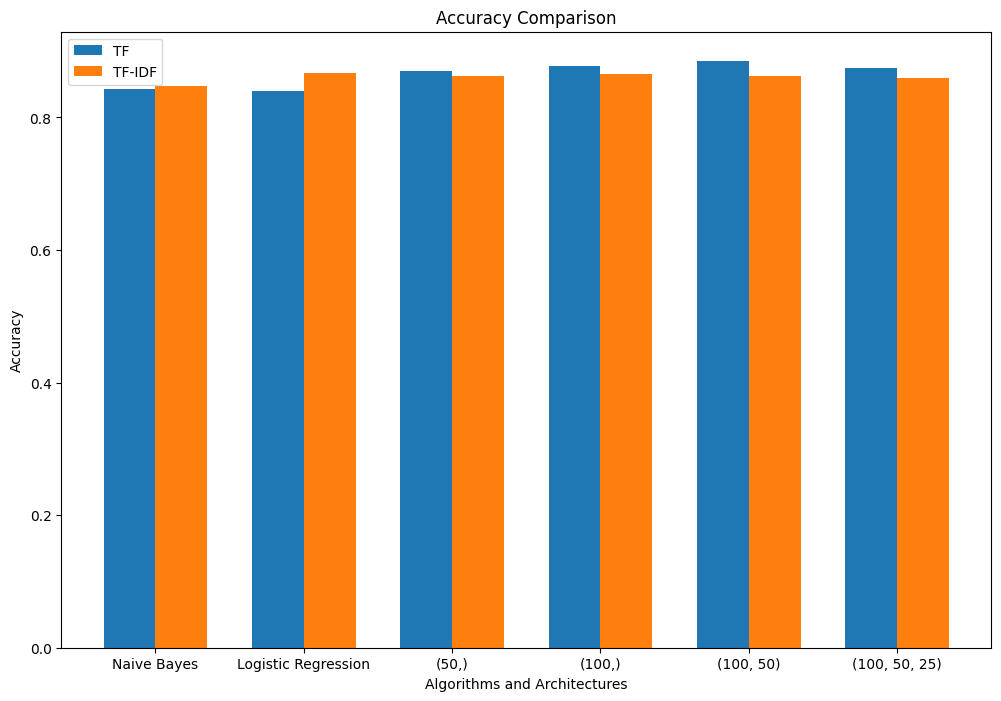

In [29]:
# Visualization
x = np.arange(len(mlp_architectures) + 2)  # +2 for Naive Bayes and Logistic Regression
width = 0.35
fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure size

for i, (vec_name, metrics) in enumerate(results.items()):
    nb_lr_accuracies = [metrics["Naive Bayes"], metrics["Logistic Regression"]]
    mlp_accuracies = [acc for _, acc in metrics["MLP"]]
    all_accuracies = nb_lr_accuracies + mlp_accuracies

    bar_positions = x + i * width
    ax.bar(bar_positions, all_accuracies, width, label=f'{vec_name}')

ax.set_xlabel('Algorithms and Architectures')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Comparison')
labels = ["Naive Bayes", "Logistic Regression"] + [str(arch) for arch in mlp_architectures]
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels)
ax.legend()

plt.show()
